<a href="https://colab.research.google.com/github/vinkrishna/ExpandingSenses/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Signal and Signal Analysis: Amplitude, Frequency, Phase, and Time-Domain Analytical Methods




# Amplitude
Amplitude is the maximum value of a signal's waveform from the mean or zero value. The amplitude can be expressed as the peak value, peak-to-peak value, or root mean square (RMS) value. The amplitude can provide useful information about the signal's strength or energy.

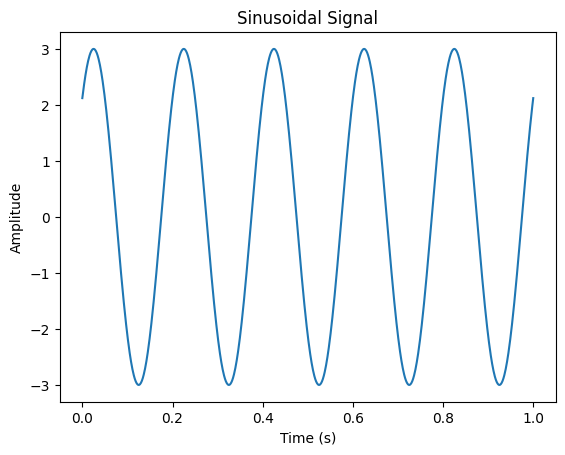

Peak Amplitude: 2.9978777525277454
Peak-to-Peak Amplitude: 5.999990728716487
RMS Amplitude: 2.1213203435596424


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sinusoidal signal
t = np.linspace(0, 1, 1000)
f = 5  # frequency in Hz
A = 3  # amplitude
phi = np.pi / 4  # phase

signal = A * np.sin(2 * np.pi * f * t + phi)

# Calculate amplitude
peak_amplitude = np.max(signal) - np.mean(signal)
peak_to_peak_amplitude = np.max(signal) - np.min(signal)
rms_amplitude = np.sqrt(np.mean(np.square(signal)))

# Plot the signal
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Signal')
plt.show()

print(f"Peak Amplitude: {peak_amplitude}")
print(f"Peak-to-Peak Amplitude: {peak_to_peak_amplitude}")
print(f"RMS Amplitude: {rms_amplitude}")


#Frequency
Frequency is the number of cycles per unit of time, often measured in Hertz (Hz). In signal analysis, the frequency domain representation can help identify the signal's main frequency components or harmonics.

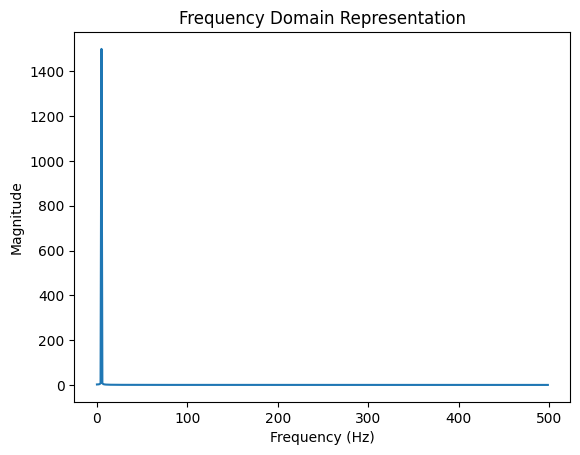

In [2]:
from scipy.fft import fft

# Calculate the Fast Fourier Transform (FFT) of the signal
signal_fft = fft(signal)

# Calculate the frequencies associated with the FFT
freqs = np.fft.fftfreq(len(signal), np.mean(np.diff(t)))

# Plot the frequency domain representation
plt.plot(freqs[:len(freqs)//2], np.abs(signal_fft[:len(signal_fft)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation')
plt.show()


#Phase
Phase is the relative position of a waveform in time, typically expressed in degrees or radians. The phase difference between two signals can provide insights into their synchronization or time delay.

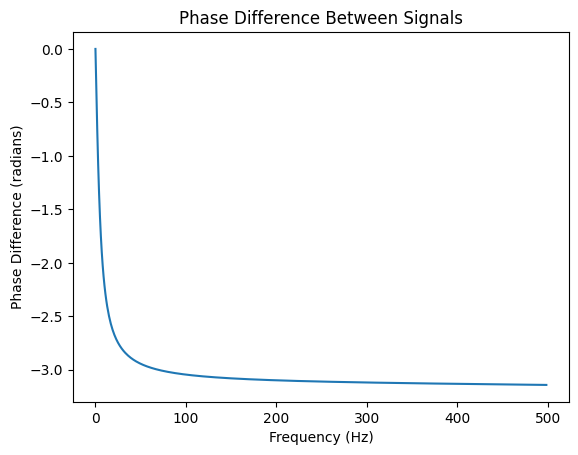

In [3]:
# Generate a second sinusoidal signal with a different phase
phi2 = 3 * np.pi / 4
signal2 = A * np.sin(2 * np.pi * f * t + phi2)

# Calculate the cross-spectrum between the two signals
cross_spectrum = np.fft.fft(signal) * np.conj(np.fft.fft(signal2))

# Calculate the phase difference between the signals
phase_diff = np.angle(cross_spectrum)

# Plot the phase difference
plt.plot(freqs[:len(freqs)//2], phase_diff[:len(phase_diff)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Difference (radians)')
plt.title('Phase Difference Between Signals')
plt.show()



#Time-Domain Analytical Methods
Time-domain methods analyze the signal in its original form, focusing on amplitude and time characteristics. Common techniques include signal averaging, time-domain filters, autocorrelation, and cross-correlation.


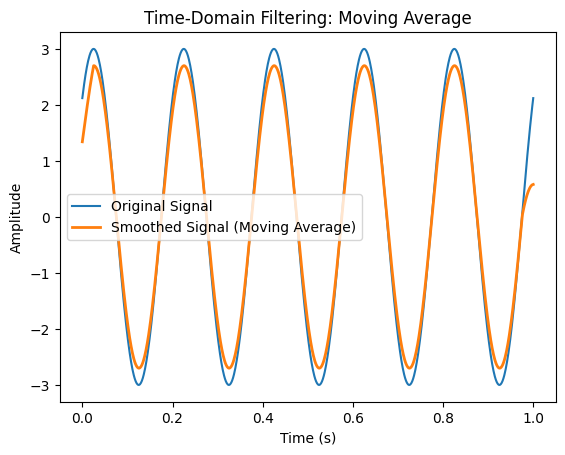

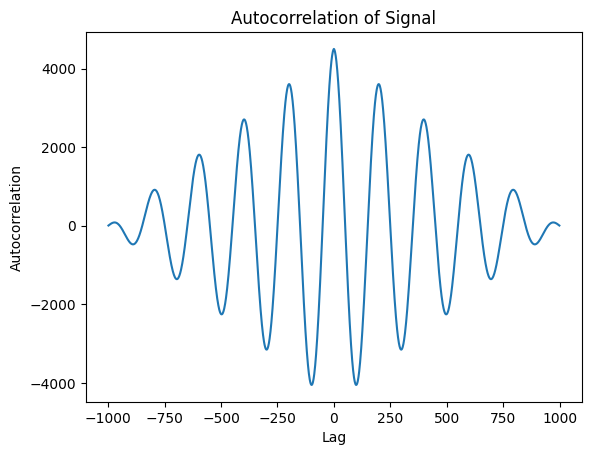

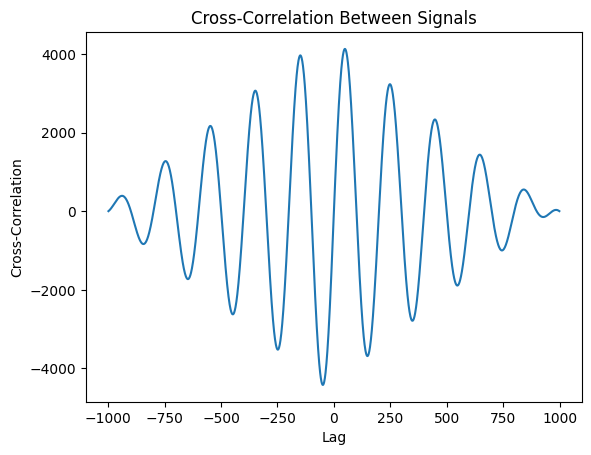

In [4]:
# Example: Moving Average Filter
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 50
smoothed_signal = moving_average(signal, window_size)

# Plot original and smoothed signals
plt.plot(t, signal, label='Original Signal')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average')
plt.show()

# Example: Autocorrelation
def autocorrelation(signal):
    return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_signal = autocorrelation(signal)
autocorr_lags = np.arange(-len(signal) + 1, len(signal))

# Plot autocorrelation
plt.plot(autocorr_lags, autocorr_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Signal')
plt.show()

# Example: Cross-Correlation
def crosscorrelation(signal1, signal2):
    return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_signal = crosscorrelation(signal, signal2)
crosscorr_lags = np.arange(-len(signal) + 1, len(signal))

# Plot cross-correlation
plt.plot(crosscorr_lags, crosscorr_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Signals')
plt.show()


# Amplitude, phase, frequency and time on EEG Data
In this example, we simulate an 8-channel EEG dataset and demonstrate amplitude, phase, frequency, and time-domain analysis methods using the generated data. These examples can be used as a starting point for more complex analysis of multi-channel EEG data.

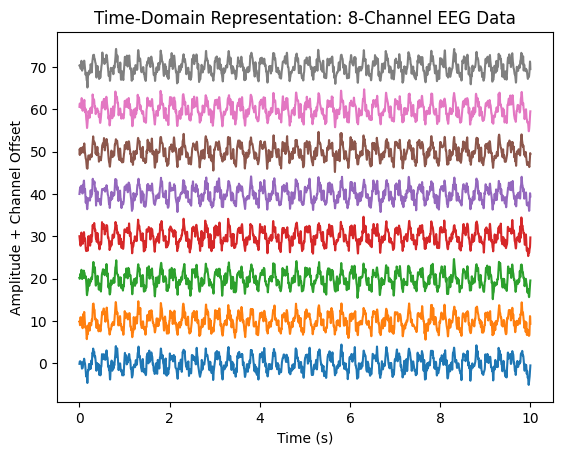

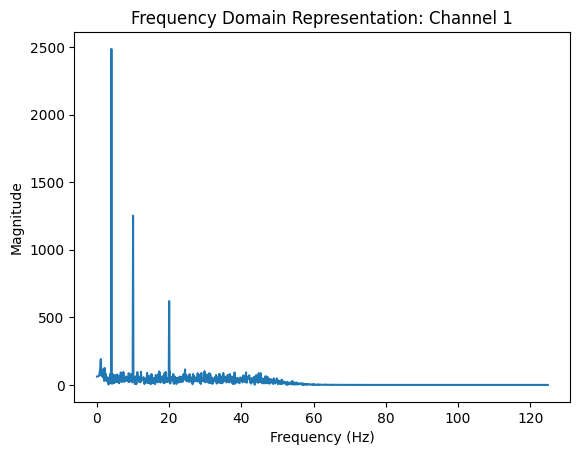

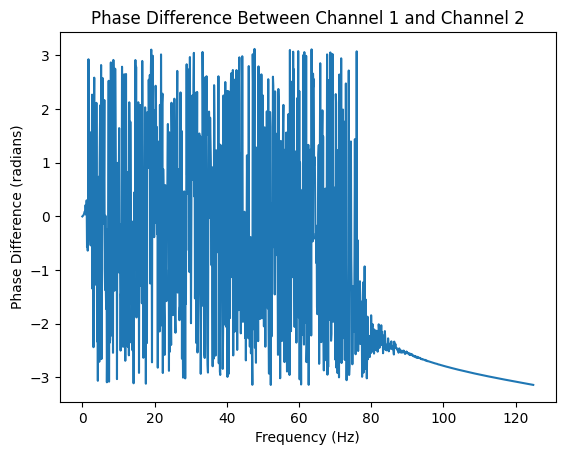

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to create a Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Generate synthetic 8-channel EEG data
np.random.seed(42)
fs = 250  # sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # time vector
num_channels = 8

# Generate random EEG-like signals
eeg_data = np.random.normal(0, 1, (num_channels, len(t)))

# Add sinusoidal components to the EEG data to simulate brain rhythms
freqs = [4, 10, 20]  # frequencies in Hz
amplitudes = [2, 1, 0.5]  # amplitudes
phases = [0, np.pi / 4, np.pi / 2]  # phases

for channel in range(num_channels):
    for f, A, phi in zip(freqs, amplitudes, phases):
        eeg_data[channel] += A * np.sin(2 * np.pi * f * t + phi)

# Band-pass filter the EEG data to keep frequency components within the range of 1-50 Hz
lowcut, highcut = 1, 50
eeg_data_filtered = np.zeros_like(eeg_data)

for channel in range(num_channels):
    eeg_data_filtered[channel] = butter_bandpass_filter(eeg_data[channel], lowcut, highcut, fs)

# Calculate the FFT of the filtered EEG data
eeg_fft = np.fft.fft(eeg_data_filtered, axis=1)
freqs_fft = np.fft.fftfreq(len(t), 1 / fs)

# Calculate the phase difference between channel 1 and channel 2
cross_spectrum = eeg_fft[0] * np.conj(eeg_fft[1])
phase_diff = np.angle(cross_spectrum)

# Plot the time-domain representation of the 8-channel EEG data
plt.figure()
for channel in range(num_channels):
    plt.plot(t, eeg_data_filtered[channel] + 10 * channel)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude + Channel Offset')
plt.title('Time-Domain Representation: 8-Channel EEG Data')
plt.show()

# Plot the frequency-domain representation of channel 1
plt.figure()
plt.plot(freqs_fft[:len(freqs_fft)//2], np.abs(eeg_fft[0][:len(eeg_fft[0])//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation: Channel 1')
plt.show()

# Plot the phase difference between channel 1 and channel 2
plt.figure()
plt.plot(freqs_fft[:len(freqs_fft)//2], phase_diff[:len(phase_diff)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Difference (radians)')
plt.title('Phase Difference Between Channel 1 and Channel 2')
plt.show()


#

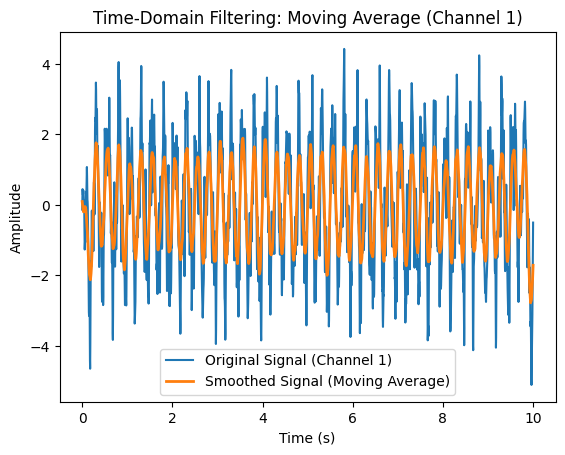

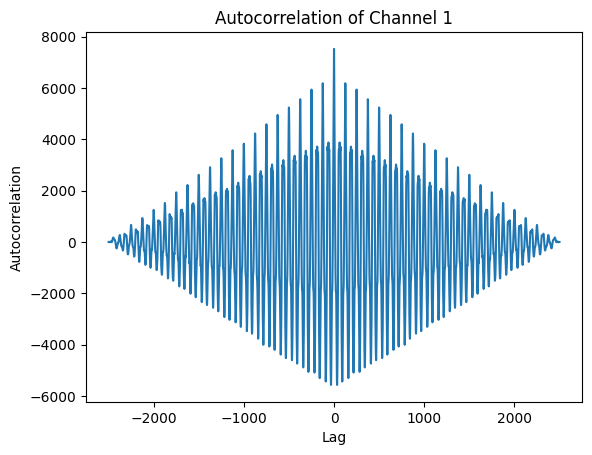

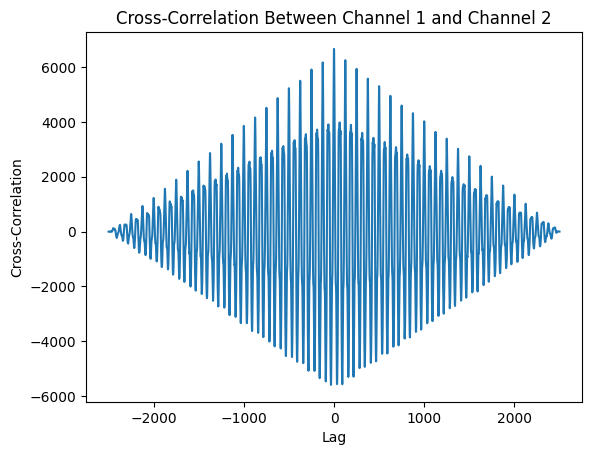

In [12]:
#Time-domain analysis: Moving average filter
def moving_average(signal, window_size):
  return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 25
smoothed_eeg_data = np.zeros_like(eeg_data_filtered)

for channel in range(num_channels):
  smoothed_eeg_data[channel] = moving_average(eeg_data_filtered[channel], window_size)

#Plot original and smoothed signals of channel 1
plt.figure()
plt.plot(t, eeg_data_filtered[0], label='Original Signal (Channel 1)')
plt.plot(t, smoothed_eeg_data[0], label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average (Channel 1)')
plt.show()

#Autocorrelation of channel 1
def autocorrelation(signal):
  return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_eeg_signal = autocorrelation(eeg_data_filtered[0])
autocorr_lags = np.arange(-len(t) + 1, len(t))

#Plot autocorrelation
plt.figure()
plt.plot(autocorr_lags, autocorr_eeg_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Channel 1')
plt.show()

#Cross-correlation between channel 1 and channel 2
def crosscorrelation(signal1, signal2):
  return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_eeg_signal = crosscorrelation(eeg_data_filtered[0], eeg_data_filtered[1])
crosscorr_lags = np.arange(-len(t) + 1, len(t))

#Plot cross-correlation
plt.figure()
plt.plot(crosscorr_lags, crosscorr_eeg_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Channel 1 and Channel 2')
plt.show()